<a href="https://colab.research.google.com/github/kussy29/machine_learning/blob/main/lab12_nlp_towards_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Is a *queen* really just a *king*, minus a *man*, plus a *woman*?**

--------------



In class, we dealt with **embeddings** trained for **sentiment classification**. These embeddings are optimized to separate *positive* from *negative* expressions and **do not encode deeper semantic information**.

However, in modern natural language processing, there exist other embeddings — such as those from **BERT**, **word2vec**, or **GloVe** — that **do capture semantic structure**. These models are trained on large corpora, and their embeddings often allow for meaningful **vector arithmetic**, like the famous:

```
embedding("king") - embedding("man") + embedding("woman") ≈ embedding("queen")
```

This homework explores **semantic vector relationships** using such pretrained embeddings.

## **The Objective**

Your task is to:

1. Construct semantic classes of word pairs.
2. Visualize them using PCA.
3. Explore arithmetic operations in embedding space.

## **Tasks & Deliverables**

### 1. **Semantic Pair Classes**

- You must gather **at least 10 classes** of semantically related word pairs.
- Each class must contain **at least 5 pairs**.
- That gives a **minimum total of 100 unique words** (10 classes x 5 pairs x 2 words per pair).

Two example classes:

**Class 1: Gender**

- (king, queen)
- (man, woman)
- (doctor, nurse)
- (prince, princess)
- *(you must add one more)*

**Class 2: Verb tense (past tense)**

- (bring, brought)
- (get, got)
- (like, liked)
- *(you must add two more)*

**Your job:**

- Invent or search for **at least 10 such classes**, including the examples above.
- Each class must be conceptually coherent.
- Other examples: singular/plural, country/capital, comparative/superlative, tool/user, job/object, etc.

### 2. **Global PCA (Across All Words)**

- Use PCA to reduce the **entire set of 100 word embeddings** to 2D, and plot it.
- Plot the additional **10 separate charts**, one for each class.
  - Each chart should display only the 10 words (5 pairs) of the given class.
- Points should be labeled with the words themselves.

### 3. **Local PCA (Per Class)**

- For each class (10 total), perform PCA **only** on the 10 words of that class.
- Plot these class-wise PCA visualizations as separate charts.
- Again, points should be labeled with the words.

**Total: 21 charts**
(1 global plot with 100 words + 10 global-space class plots + 10 local PCA class plots)

Charts should be presented in a self-explanatory manner with clear labels.

### 4. **Embedding Arithmetic**

For each class, choose **one example pair** (e.g., (king, queen)) and perform the operation:

```
embedding(B) - embedding(A) + embedding(C)
```

Where A and B form a known pair, and C is another base word.
For example:

```
embedding("king") - embedding("man") + embedding("woman")
```

* For each such result vector, find the **5 closest word embeddings** (using cosine similarity or Euclidean distance).
* Print the top 5 neighbors **with their distances**.
* Do this **once per class** (i.e., 10 times).

This will make it possible to verify if
 ```
embedding("queen") ≈ embedding("king") - embedding("man") + embedding("woman")
```
for the *gender*-related class.


### 5. **Discussion**

* Analyze and interpret your 21 plots.
* Discuss whether the vector relationships are preserved.
* Does PCA capture semantic differences?
* Are the closest words from the arithmetic meaningful?
* What kinds of relationships are captured, and what are not?
* Are some classes better behaved than others?


### 6. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.


## Acknowledgments

*This homework assignment was inspired by an idea from my master's student **Andrzej Małek**, to whom I would like to express my thanks.*



**Class 1: Gender** (man - woman)


*   King - Queen
*   Man - Woman
*   Doctor - Nurse
*   Prince - Princess
*   Actor - Actress
*   Uncle - Aunt

**Class 2: Past tense** (present or now - past)


*   bring - brought
*   get - got
*   like - liked
*   give - gave
*   leave - left
*   can - could

**Class 3: Capital** (country - capital)

*   Poland - Warsaw
*   USA - Washington
*   Washington - Olympia
*   Turkey - Ankara
*   Liechtenstein - Vaduz
*   Bavaria - Munich

**Class 4: Antonims** (just check if they are opposite by multiplying whole vector by -1)

*   pretty - ugly
*   happy - sad
*   noise - silence
*   wealth - poverty
*   quickly - slowly
*   left - right

**Class 5: Adjective** (noun - adjective)

*  Poland - polish
*  wealth - wealthy
*  happiness - happy
*  creativity - creative
*  beauty - beautiful
*  fun - funny

**Class 6: Substitutes** (just check if they are similar to each other)

*  Orange - tangerine
*  Butter - margarine
*  Coffee - Tea
*  Coca-cola - Pepsi
*  Sandwich - Burger

**Class 7 - diminutives**(big - small)

*  dear - darling
*  Charles - Charlie
*  duck - duckling
*  dog - doggie
*  cat - kitty

**Class 8 - Child** (parent or human - child)

*  Dog - puppy
*  Cow - calf
*  cat - kitten
*  Horse - foal
*  Swan - cygnet

**Class 9 - Meat** (animal - meat)

*  pig - pork
*  cow - beef
*  sheep - mutton
*  deer - venison
*  bird - poultry

**Class 10 - Food** (ingredient - food)

*  potato - chips
*  lettuce - salad
*  pork - chop
*  wheat - bread
*  avocado - guacamole


In [ ]:
!pip install --upgrade numpy scipy gensim

# for this to work you need to reset kernel
import os
os._exit(00)

  Using cached numpy-2.3.0-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.15.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)


In [1]:
import gensim.downloader as api
#another option: word2vec-google-news-300
model = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [7]:
gender=['king','queen','man','woman','doctor','nurse','prince','princess','actor','actress','uncle','aunt']
past=['bring','brought','get','got','like','liked','give','gave','leave','left','can','could']
capital=['poland','warsaw','usa','washington,d.c.','washington','olympia','turkey','ankara','liechtenstein','vaduz','bavaria','munich']
antonyms=['pretty','ugly','happy','sad','noise','silence','wealth','poverty','quickly','slowly','left','right']
adjective=['poland','polish','wealth','wealthy','happiness','happy','creativity','creative','beauty','beautiful','fun','funny']
substitutes=['orange','tangerine','butter','margarine','coffee','tea','coca-cola','pepsi','sandwich','burger']
diminutives=['dear','darling','charles','charlie','duck','duckling','dog','doggie','cat','kitty']
child=['dog','puppy','cow','calf','cat','kitten','horse','foal','swan','cygnet']
meat=['pig','pork','cow','beef','sheep','mutton','deer','venison','bird','poultry']
food=['potato','chips','lettuce','salad','pork','chop','wheat','bread','avocado','guacamole']
all_words=set(gender+past+capital+antonyms+adjective+substitutes+diminutives+child+meat+food)
print(f'Number of words {len(all_words)}')

Number of words 102


In [12]:
vector=model['d.c']
model.most_similar('king')

[('prince', 0.7682328820228577),
 ('queen', 0.7507690787315369),
 ('son', 0.7020888328552246),
 ('brother', 0.6985775232315063),
 ('monarch', 0.6977890729904175),
 ('throne', 0.6919989585876465),
 ('kingdom', 0.6811409592628479),
 ('father', 0.6802029013633728),
 ('emperor', 0.6712858080863953),
 ('ii', 0.6676074266433716)]

In [9]:
gender_vectors=[]
for word in gender:
  gender_vectors.append(model[word])
past_vectors=[]
for word in past:
  past_vectors.append(model[word])
capital_vectors=[]
for word in capital:
  try:
    capital_vectors.append(model[word])
  except:
    capital_vectors.append(model['washington']+model['d.c.'])
antonyms_vectors=[]
for word in antonyms:
  antonyms_vectors.append(model[word])
adjective_vectors=[]
for word in adjective:
  adjective_vectors.append(model[word])
substitutes_vectors=[]
for word in substitutes:
  substitutes_vectors.append(model[word])
diminutives_vectors=[]
for word in diminutives:
  diminutives_vectors.append(model[word])
child_vectors=[]
for word in child:
  child_vectors.append(model[word])
meat_vectors=[]
for word in meat:
  meat_vectors.append(model[word])
food_vectors=[]
for word in food:
  food_vectors.append(model[word])
all_words_vectors=[]
for word in all_words:
  all_words_vectors.append(model[word])



KeyError: "Key 'washington,d.c.' not present"

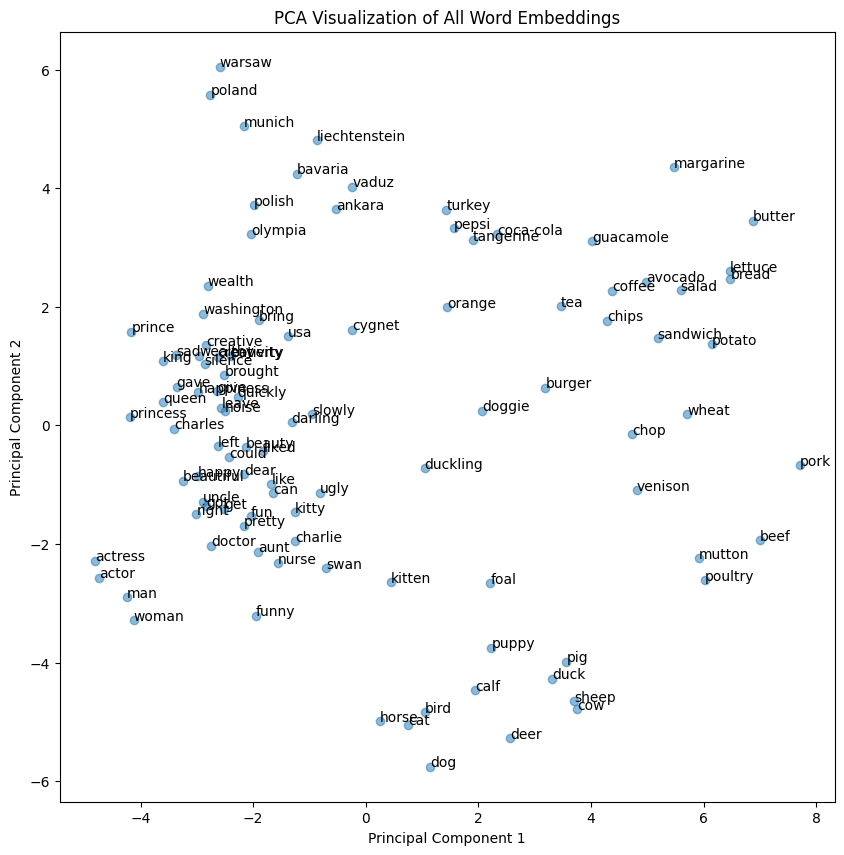

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

n_components=2
# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_words_vectors)

# Perform PCA to reduce the dimensions
n_components = 100  # Number of principal components to retain
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)



plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
for i, word in enumerate(all_words):
    plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of All Word Embeddings')
plt.show()

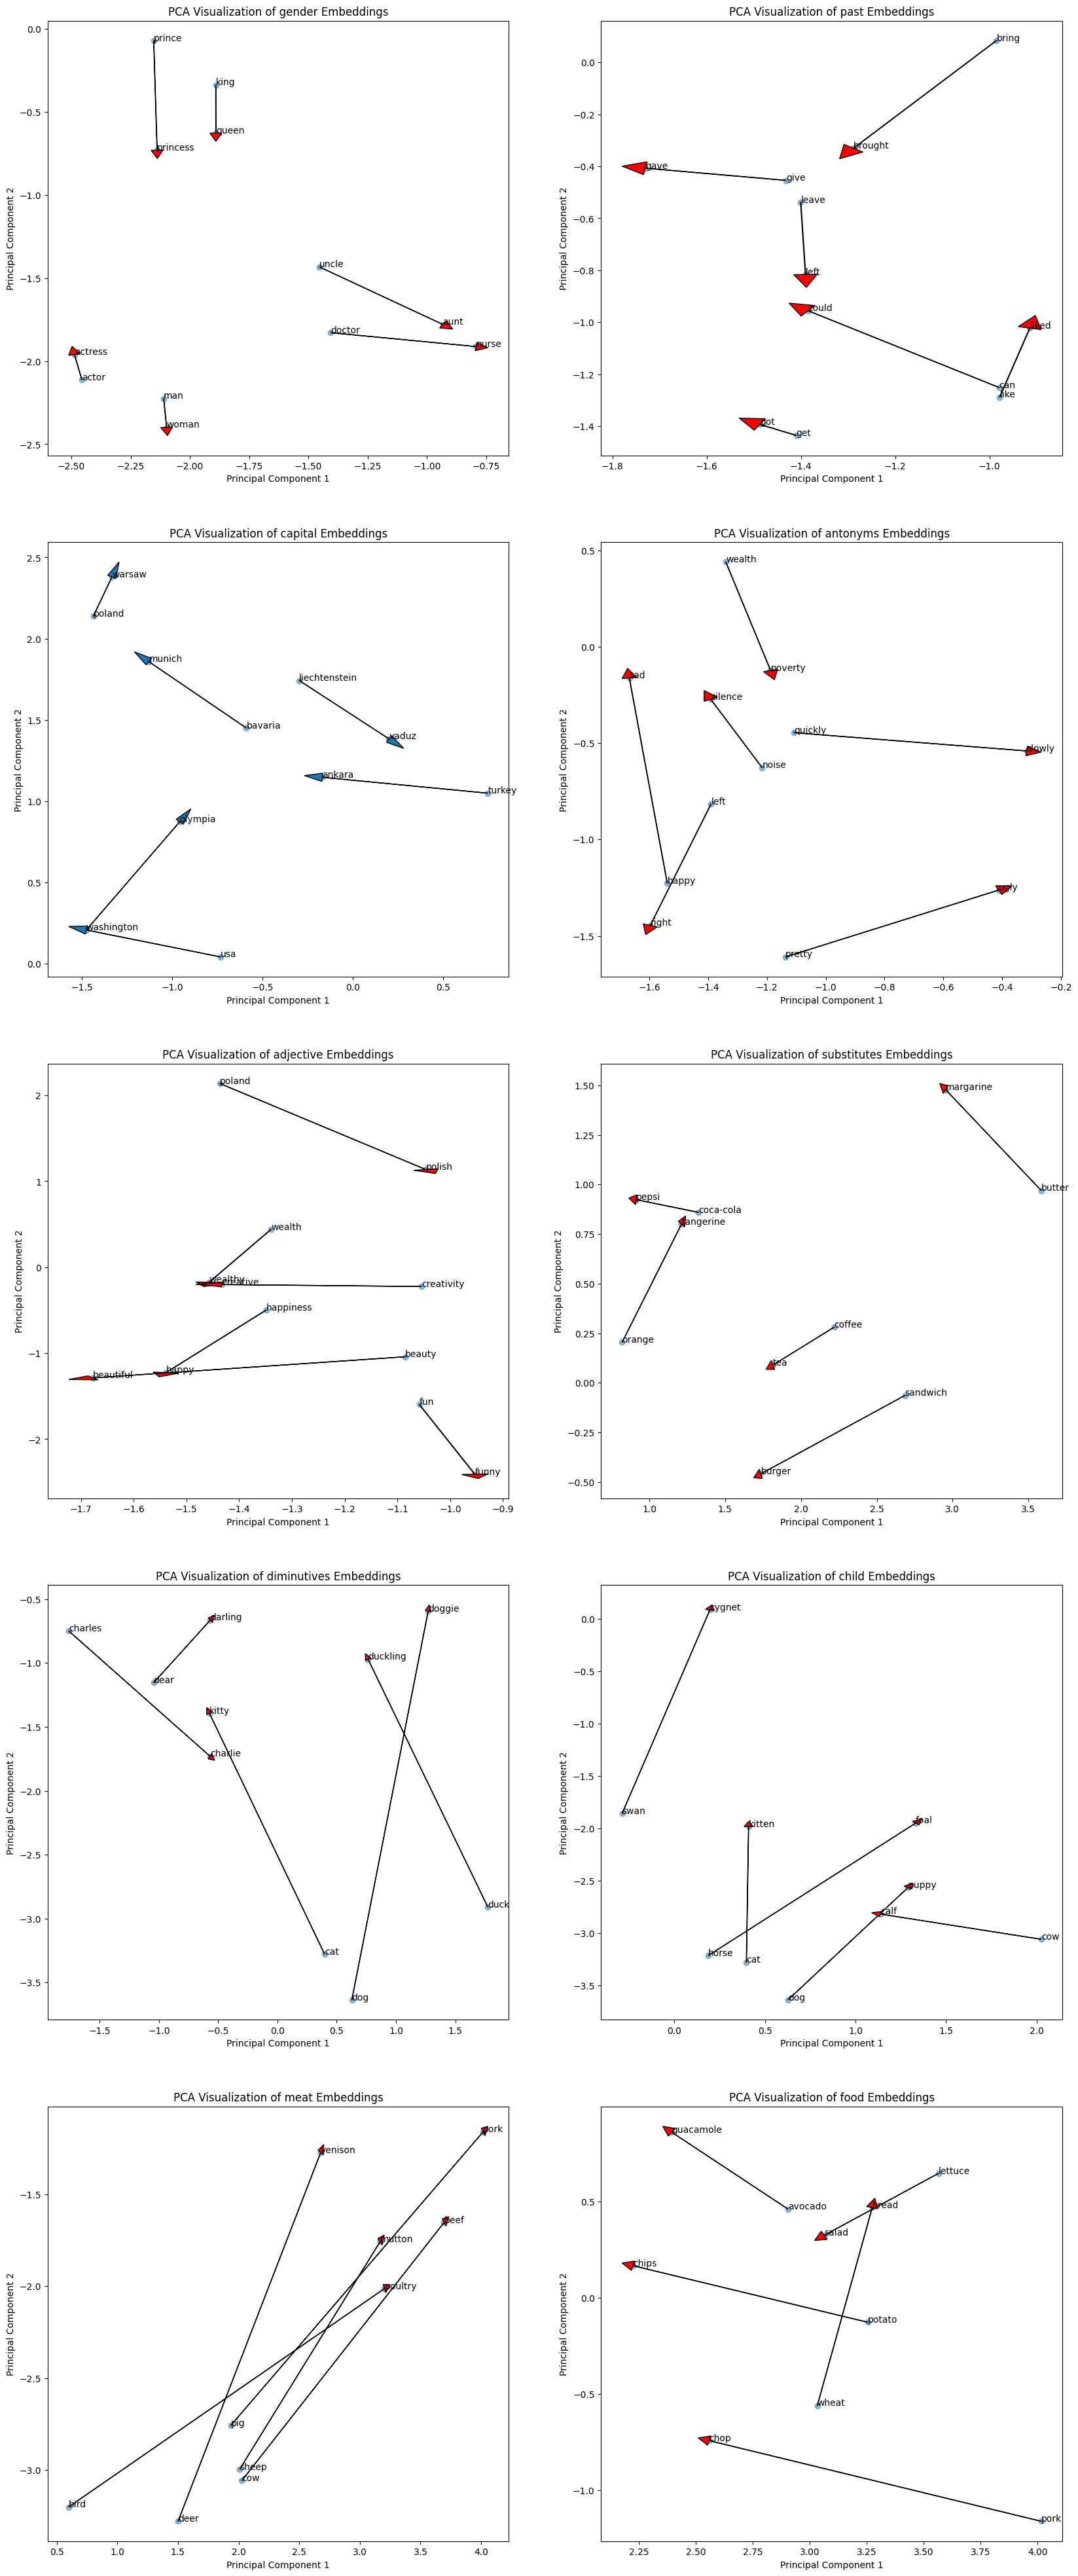

In [ ]:
classes=['gender','past','capital','antonyms','adjective','substitutes','diminutives','child','meat','food']
word_vectors=[gender,past,capital,antonyms,adjective,substitutes,diminutives,child,meat,food]
vectors=[gender_vectors,past_vectors,capital_vectors,antonyms_vectors,adjective_vectors,substitutes_vectors,diminutives_vectors,child_vectors,meat_vectors,food_vectors]


plt.figure(figsize=(20, 50))
for i,clas in enumerate(classes):
  plt.subplot(5, 2, i+1)
  X_class=pca.transform(vectors[i])
  plt.scatter(X_class[:, 0], X_class[:, 1], alpha=0.5)
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title(f'PCA Visualization of {clas} Embeddings')
  for j, word in enumerate(word_vectors[i]):
    plt.annotate(word, (X_class[j, 0], X_class[j, 1]))
  #if clas=='capital':
  #  plt.arrow(X_class[0,0],X_class[0,1],X_class[1,0]-X_class[0,0],X_class[1,1]-X_class[0,1],head_width=0.05, head_length=0.1)
  #  plt.arrow(X_class[2,0],X_class[2,1],X_class[3,0]-X_class[2,0],X_class[3,1]-X_class[2,1],head_width=0.05, head_length=0.1)
  #  plt.arrow(X_class[3,0],X_class[3,1],X_class[4,0]-X_class[3,0],X_class[4,1]-X_class[3,1],head_width=0.05, head_length=0.1)
  #  plt.arrow(X_class[5,0],X_class[5,1],X_class[6,0]-X_class[5,0],X_class[6,1]-X_class[5,1],head_width=0.05, head_length=0.1)
  #  plt.arrow(X_class[7,0],X_class[7,1],X_class[8,0]-X_class[7,0],X_class[8,1]-X_class[7,1],head_width=0.05, head_length=0.1)
  #  plt.arrow(X_class[9,0],X_class[9,1],X_class[10,0]-X_class[9,0],X_class[10,1]-X_class[9,1],head_width=0.05, head_length=0.1)

  #else:
  for j in range(len(word_vectors[i])//2):
    plt.arrow(X_class[2*j,0],X_class[2*j,1],X_class[2*j+1,0]-X_class[2*j,0],X_class[2*j+1,1]-X_class[2*j,1],head_width=0.05, head_length=0.05,fc='red', ec='black')

### Local PCA

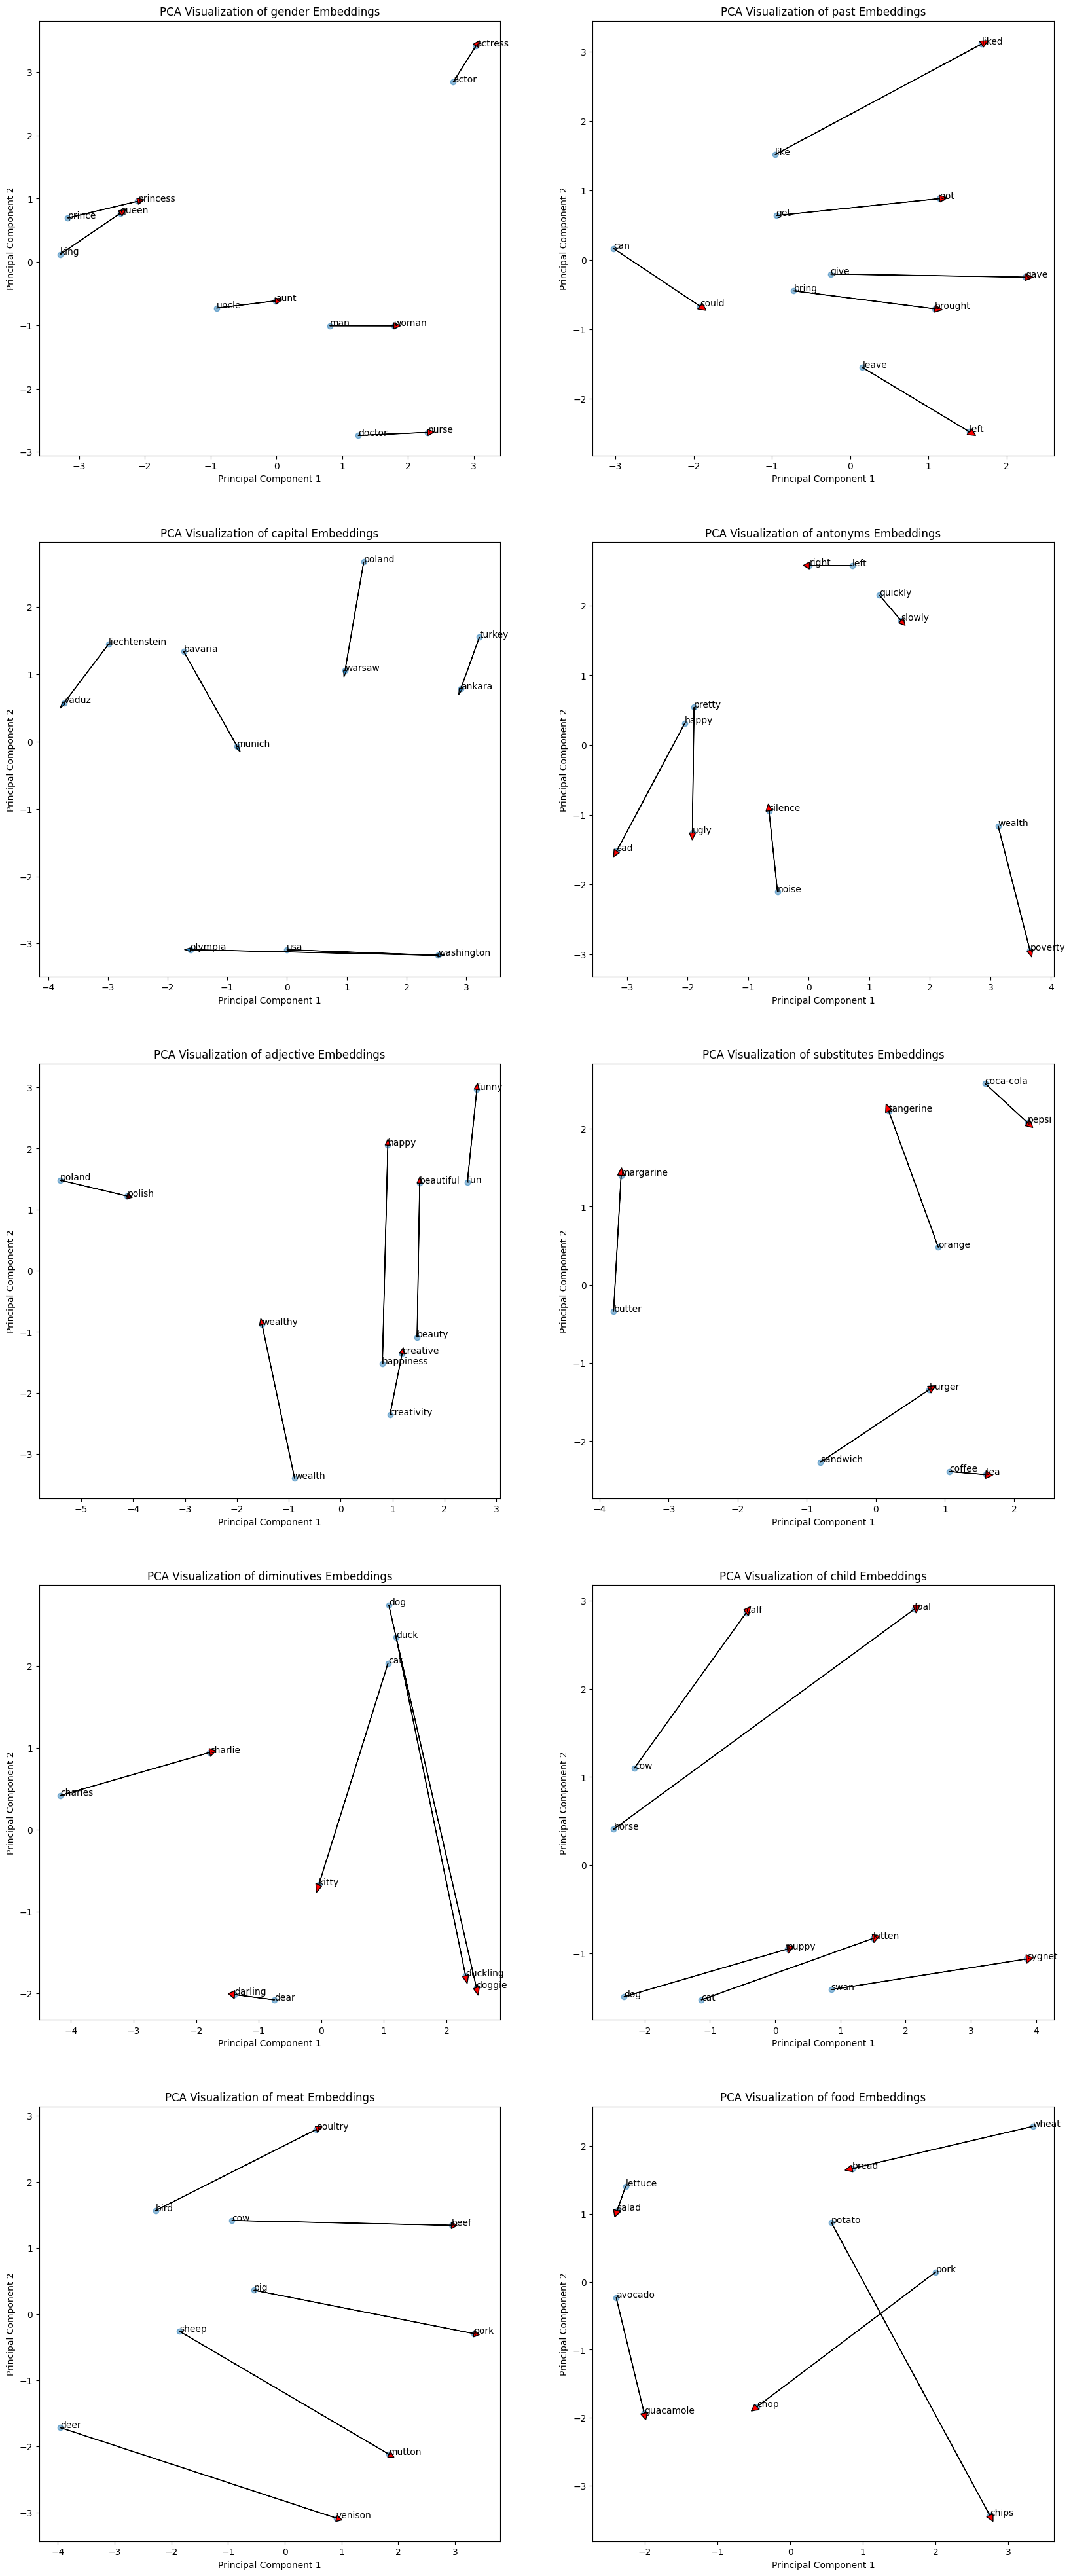

In [ ]:
plt.figure(figsize=(20, 50))
for i,clas in enumerate(classes):
  plt.subplot(5, 2, i+1)
  pca_class = PCA(n_components=2)
  X_class=pca_class.fit_transform(vectors[i])
  plt.scatter(X_class[:, 0], X_class[:, 1], alpha=0.5)
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title(f'PCA Visualization of {clas} Embeddings')
  for j, word in enumerate(word_vectors[i]):
    plt.annotate(word, (X_class[j, 0], X_class[j, 1]))
  if clas=='capital':
    plt.arrow(X_class[0,0],X_class[0,1],X_class[1,0]-X_class[0,0],X_class[1,1]-X_class[0,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[2,0],X_class[2,1],X_class[3,0]-X_class[2,0],X_class[3,1]-X_class[2,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[3,0],X_class[3,1],X_class[4,0]-X_class[3,0],X_class[4,1]-X_class[3,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[5,0],X_class[5,1],X_class[6,0]-X_class[5,0],X_class[6,1]-X_class[5,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[7,0],X_class[7,1],X_class[8,0]-X_class[7,0],X_class[8,1]-X_class[7,1],head_width=0.05, head_length=0.1)
    plt.arrow(X_class[9,0],X_class[9,1],X_class[10,0]-X_class[9,0],X_class[10,1]-X_class[9,1],head_width=0.05, head_length=0.1)

  else:
    for j in range(len(word_vectors[i])//2):
      plt.arrow(X_class[2*j,0],X_class[2*j,1],X_class[2*j+1,0]-X_class[2*j,0],X_class[2*j+1,1]-X_class[2*j,1],head_width=0.1, head_length=0.1,fc='red', ec='black')